In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
%matplotlib inline

In [5]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/speed_data/speed_data_supertable.csv')

In [6]:
data.describe()

,GPU TFLOPS,Model FLOPs,Latency (ms),Average Tensor Size (MB),Max Tensor Size (MB),Number of Parameters,Speed (steps/sec),Step Time (s)
count,208.00000,2.080000e+02,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000
mean,6.81950,5.541846e+07,15.300000,0.156059,1.687500,7.920722e+06,5.741883,0.615639
std,2.71303,7.424630e+07,15.036188,0.177789,1.953258,1.061111e+07,5.948928,0.840310
min,4.11300,4.856736e+06,0.300000,0.040375,0.562500,6.938180e+05,0.324141,0.040085
25%,4.11300,1.096726e+07,0.300000,0.049794,0.562500,1.566746e+06,1.972673,0.141233
50%,6.81950,1.673322e+07,15.300000,0.060537,0.562500,2.392354e+06,3.916911,0.259919
75%,9.52600,6.118441e+07,30.300000,0.166802,1.687500,8.746330e+06,7.083276,0.506940
max,9.52600,1.833507e+08,30.300000,0.462786,5.062500,2.620436e+07,24.946808,3.085076


In [144]:
X = data[['GPU TFLOPS', 'Model FLOPs', 'Latency (ms)', 'Average Tensor Size (MB)','Max Tensor Size (MB)', 'Number of Parameters']]
# X = data[['GPU TFLOPS', 'Model FLOPs', 'Latency (ms)']]
y = data[['Step Time (s)']]
# y = data[['Speed (steps/sec)']]

In [145]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [146]:
lm.score(X,y)

0.801040696435778

In [147]:
lm.coef_

array([[-5.11840000e-02, -2.08960073e-06,  1.70250559e-02,
        -5.67741817e-03, -1.25891973e-01,  1.47094806e-05]])

In [148]:
lm.intercept_

array([0.21027343])

In [149]:
predictions = lm.predict(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
regressor.score(X,y)

0.8005069680880796

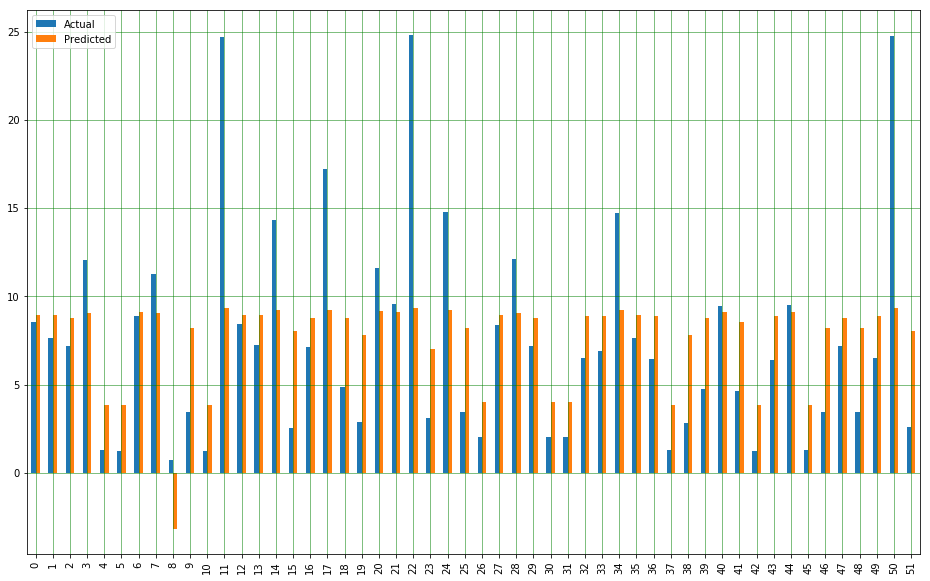

In [126]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [127]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 3.5980633634175256)
('Mean Squared Error:', 24.350971970905643)
('Root Mean Squared Error:', 4.93467040144584)


In [31]:
######## Here we go for the simple linear regression of a * GPU FLOPS/Model FLOPs + b = y, with no latency
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/speed_data/0latency_data.csv')
# division = []
# for i in range(len(data)):
#     division.append(data['GPU TFLOPS'][i]/data['Model FLOPs'][i] * 1000 * 1000 * 1000 * 1000)
# for i in range(len(data)):
#     division.append(data['Model FLOPs'][i]/data['GPU TFLOPS'][i] / 1000 / 1000 / 1000 / 1000)
# data['Result'] = division
# X = data[['Result']]
# X = data[['GPU/Model']]
X = data[['Model/GPU']]
y = data[['Step Time (s)']]
# y = data[['Speed (steps/sec)']]
# print X

In [8]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.score(X,y)

0.9209562448321436

In [9]:
lm.coef_

array([[1.39359634]])

In [10]:
lm.intercept_

array([0.12229612])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# export_csv = y_test.to_csv (r'/Users/ozymandias/desktop/export_dataframe.csv', index = None, header=True)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X,y)

0.9209507776400531

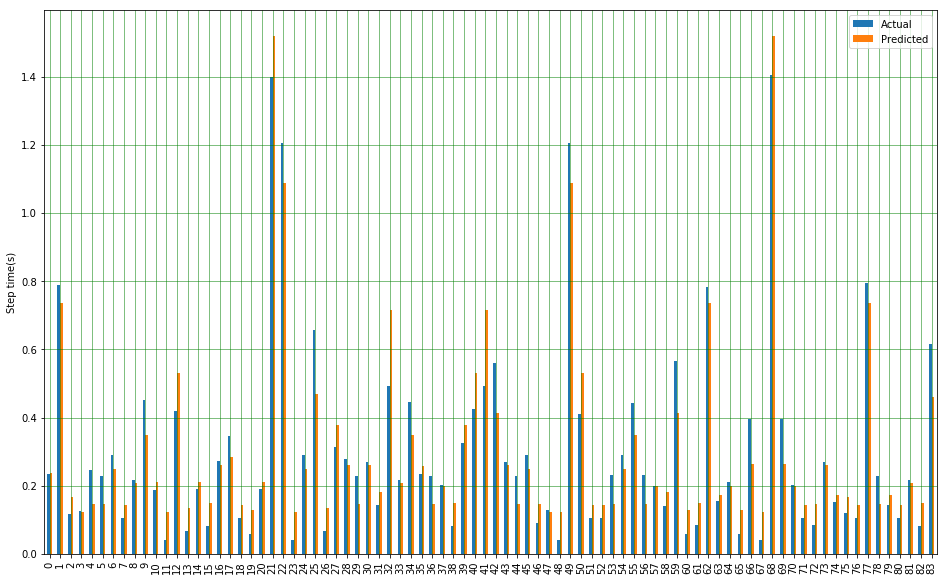

In [13]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("Step time(s)")
# plt.ylabel("Speed(Steps/sec)")
plt.show()

21.95413003319781
55.88406766347646
7


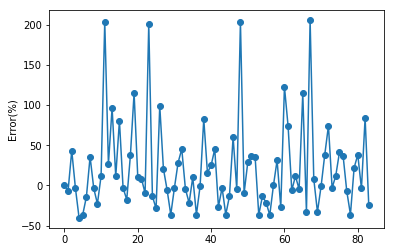

In [41]:
g = []
for i in range(len(y_pred.flatten())):
    g.append(((y_pred.flatten()[i]-y_test.values.flatten()[i])/y_test.values.flatten()[i])*100)
plt.plot(g, 'o-')
plt.ylabel("Error(%)")
count = 0
total = 0
for i in g:
    total += abs(i)
    if i > 100:
        count += 1
print np.mean(g)
print np.std(g)
print count

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.06417153400949457)
('Mean Squared Error:', 0.0064419802103457225)
('Root Mean Squared Error:', 0.08026194746170642)


In [15]:
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_absolute_error')
print scores
print("MAE: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print scores
print("MSE: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.09185882 -0.11000732 -0.06379311 -0.0364289  -0.06885666 -0.05946531
 -0.13028781 -0.14838281 -0.02207002 -0.0476706 ]
MAE: -0.078 (+/- 0.078)
[-0.01707689 -0.01475766 -0.0099022  -0.00193276 -0.00481736 -0.00361011
 -0.01949254 -0.02366635 -0.0015695  -0.00471979]
MSE: -0.010 (+/- 0.015)
[ 0.94722267  0.55553433  0.41675012  0.57437994  0.95646485  0.19109738
 -0.49511203  0.80846961  0.98114994  0.64729448]
Accuracy: 0.56 (+/- 0.85)


Text(0,0.5,'Steps time(s)')

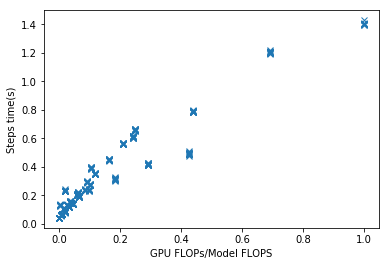

In [28]:
plt.plot(X.values, y.values, 'x')
plt.xlabel("GPU FLOPs/Model FLOPS")
plt.ylabel("Steps time(s)")
# plt.ylabel("Speed(Steps/sec)")

In [32]:
X = data[['Normalized GPU', 'Normalized Model']]
y = data[['Step Time (s)']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# export_csv = y_test.to_csv (r'/Users/ozymandias/desktop/export_dataframe.csv', index = None, header=True)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [34]:
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_absolute_error')
print scores
print("MAE: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')
print scores
print("MSE: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=10, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.21679765 -0.10010477 -0.18864565 -0.1208089  -0.06998782 -0.05606613
 -0.08393321 -0.1605206  -0.09089473 -0.12409269]
MAE: -0.121 (+/- 0.100)
[-0.05518507 -0.03341049 -0.05382569 -0.01642773 -0.00570626 -0.00318105
 -0.00915196 -0.03722837 -0.01303493 -0.02291285]
MSE: -0.025 (+/- 0.036)
[ 0.82944672 -0.00624443 -2.17038879 -2.61760317  0.94843171  0.28723531
  0.29802851  0.69871293  0.84344744 -0.71225511]
Accuracy: -0.16 (+/- 2.43)


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.10302322177832768)
('Mean Squared Error:', 0.017082969158782057)
('Root Mean Squared Error:', 0.1307018330352794)


In [21]:
###### Normalized data
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/speed_data/shake_p.csv')
# X = data[['GPU/Model']]
X = data[['Model/GPU']]
y = data[['Step Time (s)']]
# y = data[['Speed (steps/sec)']]
# print X

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
regressor.score(X,y)

0.9802615856383277

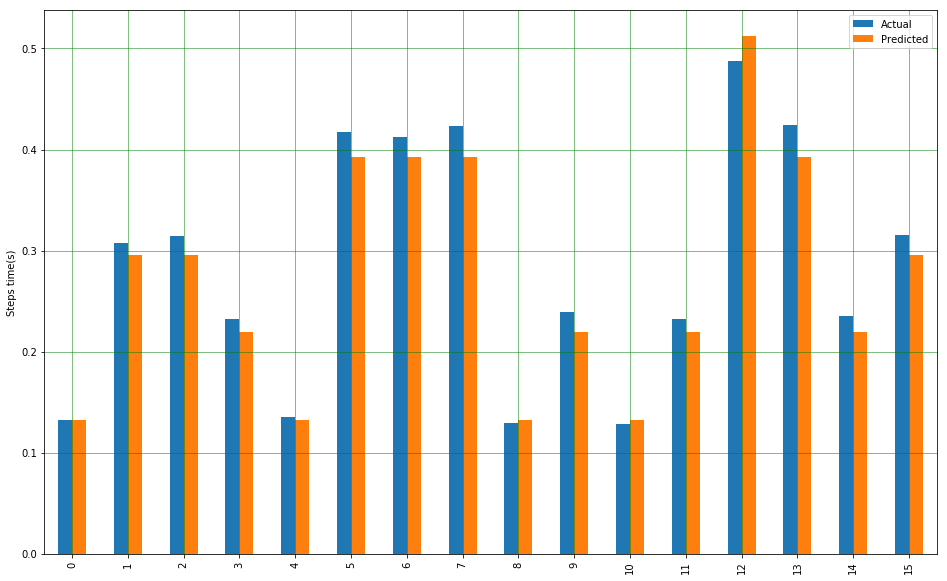

In [124]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("Steps time(s)")
plt.show()

In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.015868889207986105)
('Mean Squared Error:', 0.00033947521573188277)
('Root Mean Squared Error:', 0.01842485320787883)


In [126]:
scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.0033167  -0.00059303 -0.00015329 -0.00023874 -0.00077614]
Accuracy: -0.001 (+/- 0.002)
[0.82118007 0.9116194  0.98170954 0.89360866 0.8018944 ]
Accuracy: 0.88 (+/- 0.13)


Text(0,0.5,'Speed(Steps/sec)')

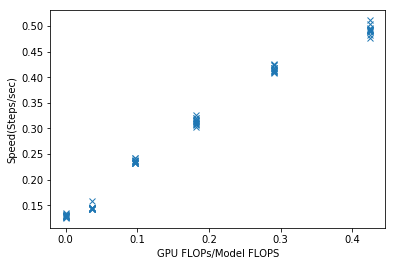

In [127]:
plt.plot(X.values, y.values, 'x')
plt.xlabel("GPU FLOPs/Model FLOPS")
# plt.ylabel("Steps time(s)")
plt.ylabel("Speed(Steps/sec)")

In [10]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/speed_data/0latency_k80.csv')
# X = data[['GPU/Model']]
X = data[['Normalized Model']]
y = data[['Step Time (s)']]
# y = data[['Speed (steps/sec)']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
regressor.score(X,y)

0.9544350931360129

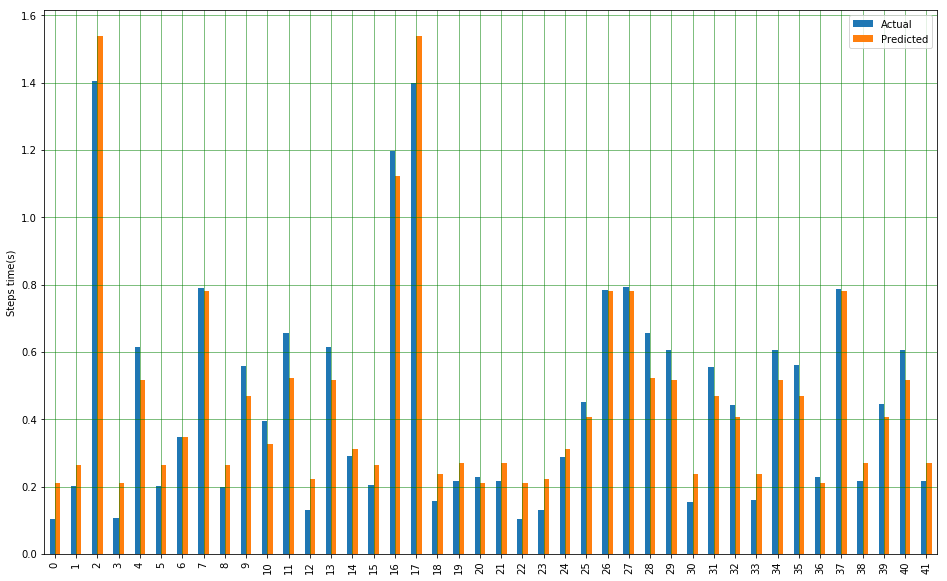

In [25]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("Steps time(s)")
plt.show()

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.06796358159488133)
('Mean Squared Error:', 0.006045719318825488)
('Root Mean Squared Error:', 0.07775422380054661)


In [27]:
scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.03351031 -0.00842454 -0.0008893  -0.01168101 -0.01016466]
Accuracy: -0.013 (+/- 0.022)
[ 0.89643407  0.21002481  0.97936341 -0.00753914  0.93330314]
Accuracy: 0.60 (+/- 0.83)


Text(0,0.5,'Steps time(s)')

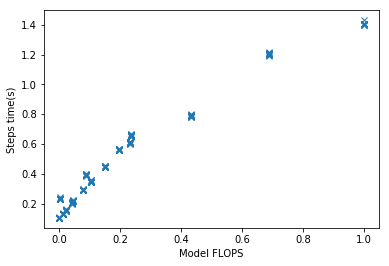

In [9]:
plt.plot(X.values, y.values, 'x')
plt.xlabel("Model FLOPS")
plt.ylabel("Steps time(s)")
# plt.ylabel("Speed(Steps/sec)")

In [99]:
data = pd.read_csv('/Users/ozymandias/desktop/experiment_results/speed_data/0latency_p100.csv')
# X = data[['GPU/Model']]
X = data[['Normalized Model']]
y = data[['Step Time (s)']]
# y = data[['Speed (steps/sec)']]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
regressor.score(X,y)

0.9090583038987765

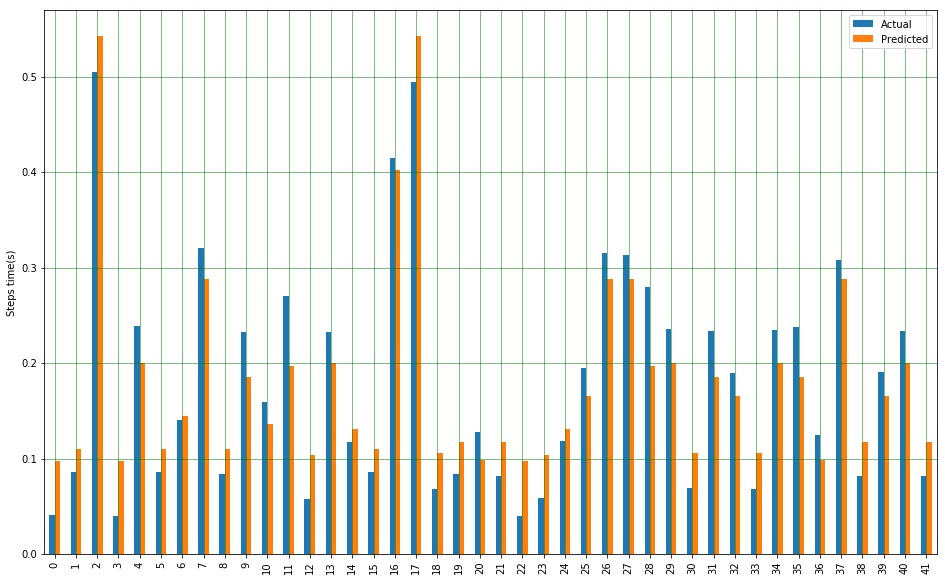

In [101]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("Steps time(s)")
plt.show()

In [102]:
scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print scores
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.00574561 -0.00186343 -0.00033281 -0.00383814 -0.00155058]
Accuracy: -0.003 (+/- 0.004)
[ 0.8522467  -0.59421604  0.95007596 -1.42977362  0.88412654]
Accuracy: 0.13 (+/- 1.94)


In [103]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 0.03540149095168502)
('Mean Squared Error:', 0.0014911835701011543)
('Root Mean Squared Error:', 0.03861584610106523)


Text(0,0.5,'Steps time(s)')

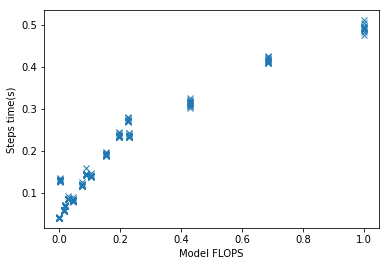

In [104]:
plt.plot(X.values, y.values, 'x')
plt.xlabel("Model FLOPS")
plt.ylabel("Steps time(s)")
# plt.ylabel("Speed(Steps/sec)")